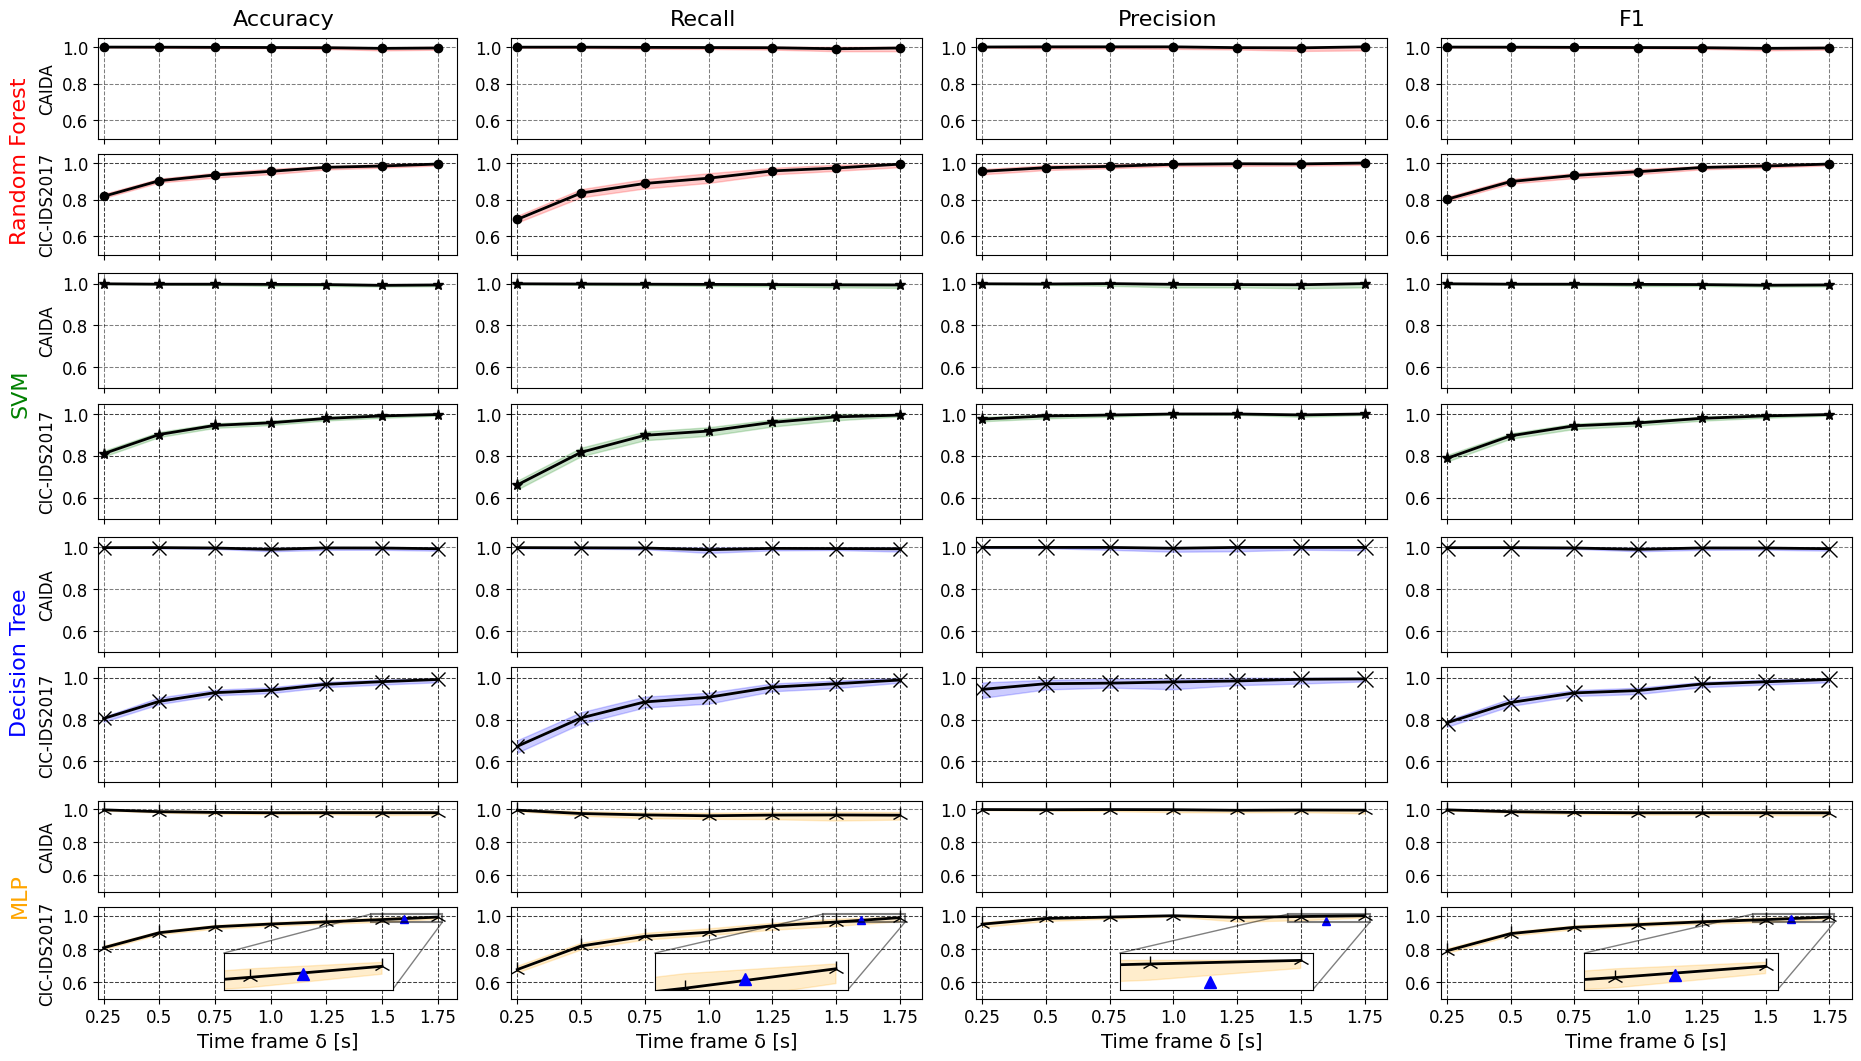

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

cic_data = {}
with open('../training/results/cic_benign_cic_ddos.json') as f:
    cic_data = json.load(f)

caida_data = {}
with open('../training/results/mawi_benign_mawi_ddos.json') as f:
    caida_data = json.load(f)


ml_algos = list(cic_data.keys())
ml_algo_names = {
    "RandomForestClassifier": "Random Forest",
    "SVC": "SVM",
    "DecisionTreeClassifier": "Decision Tree",
    "MLPClassifier": "MLP"
}
time_frames = list(map(lambda x: float(x), list(cic_data[ml_algos[0]].keys())))
metrics = list(cic_data[ml_algos[0]][str(time_frames[0])].keys())

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(18.5, 10.5)

subfigs = fig.subfigures(4, 4)

legends = []

for outerind, subfig in enumerate(subfigs.flat):
    ml_algo = ml_algos[outerind // 4]
    metric = metrics[outerind % 4]

    if outerind < 4:
        if outerind == 0:
            subfig.suptitle(metrics[outerind].capitalize(), fontsize=16, x=0.61)
        else:
            subfig.suptitle(metrics[outerind].capitalize(), fontsize=16, x=0.51)
    axs = subfig.subplots(2, 1)
    label_color = ["r", "g", "b", "orange"]
    y_offset = [0.4, 0.52, 0.5, 0.62]
    if outerind % 4 == 0:
        subfig.supylabel(ml_algo_names[ml_algos[outerind // 4]], fontsize=16, color=label_color[outerind // 4], y=y_offset[outerind // 4])
        axs[0].set_ylabel("CAIDA", fontsize=12)
        axs[1].set_ylabel("CIC-IDS2017", fontsize=12)
    
    
    axs[0].set_xticks(time_frames)
    axs[0].set_xlim([time_frames[0]*0.9, time_frames[-1]*1.05])
    axs[0].set_xticklabels([])
    axs[0].set_ylim([0.5, 1.05])
    axs[0].set_yticks([0.6, 0.8, 1.0],)
    axs[0].tick_params(axis='y', which='major', labelsize=12)
    axs[0].grid(color='k', linestyle='--', linewidth=0.75, alpha=0.5)
    axs[1].set_xticks(time_frames)
    axs[1].set_xticklabels([])
    if outerind >= 12:
        axs[1].set_xlabel("Time frame δ [s]", fontsize=14)
        axs[1].set_xticklabels(time_frames)

    for index, data in enumerate([caida_data, cic_data]):
        ys = []
        lower_quartile = []
        upper_quartile = []
        for time_frame in time_frames:
            ys.append(np.median(data[ml_algo][str(time_frame)][metric]))
            lower_quartile.append(np.percentile(data[ml_algo][str(time_frame)][metric], 5))
            upper_quartile.append(np.percentile(data[ml_algo][str(time_frame)][metric], 95))
        marker = "o" if outerind < 4 else ("*" if outerind < 8 else ("x" if outerind < 12 else "2"))
        color_fill = "r" if outerind < 4 else ("g" if outerind < 8 else ("b" if outerind < 12 else "orange"))
        label = ml_algo if outerind % 4 == 0 else None
        marker_size = 6 if outerind < 4 else (8 if outerind < 8 else (10 if outerind < 10 else 12))
        axs[index].plot(time_frames, ys, color='k', linewidth=2, marker=marker, markersize=marker_size, label=label)
        axs[index].fill_between(time_frames, lower_quartile, upper_quartile, color=color_fill, alpha=0.2)

    if "MLP" in ml_algo:
        # inset axes....
        axins = axs[1].inset_axes([0.35, 0.1, 0.47, 0.4])
        axins.plot(time_frames, ys, color='k', linewidth=2, marker=marker, markersize=marker_size)
        axins.fill_between(time_frames, lower_quartile, upper_quartile, color=color_fill, alpha=0.2)

        # subregion of the original image
        x1, x2, y1, y2 = 1.45, 1.77, 0.96, 1.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.set_xticks([])
        axins.set_yticks([])
        
        if metric == "accuracy":
            axs[1].plot([1.6],[0.982], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.982], color='b', linewidth=2, marker='^', markersize=8)
        elif metric == "f1":
            axs[1].plot([1.6],[0.98], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.98], color='b', linewidth=2, marker='^', markersize=8)

        elif metric == "precision":
            axs[1].plot([1.6],[0.971], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.971], color='b', linewidth=2, marker='^', markersize=8)
        elif metric == "recall":
            axs[1].plot([1.6],[0.975], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.975], color='b', linewidth=2, marker='^', markersize=8)

        axs[1].indicate_inset_zoom(axins, edgecolor="black", linewidth=1.5, alpha=0.5)

    axs[1].set_xlim([time_frames[0]*0.9, time_frames[-1]*1.05])
    axs[1].set_ylim([0.5, 1.05])
    axs[1].set_yticks([0.6, 0.8, 1.0],)
    axs[1].tick_params(axis='both', which='major', labelsize=12)
    axs[1].grid(color='k', linestyle='--', linewidth=0.75, alpha=0.75)

import datetime
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H_%M_%S")
plt.savefig(f"./figures/ml_matrix_ddos.png", bbox_inches='tight', dpi=300)
plt.show()




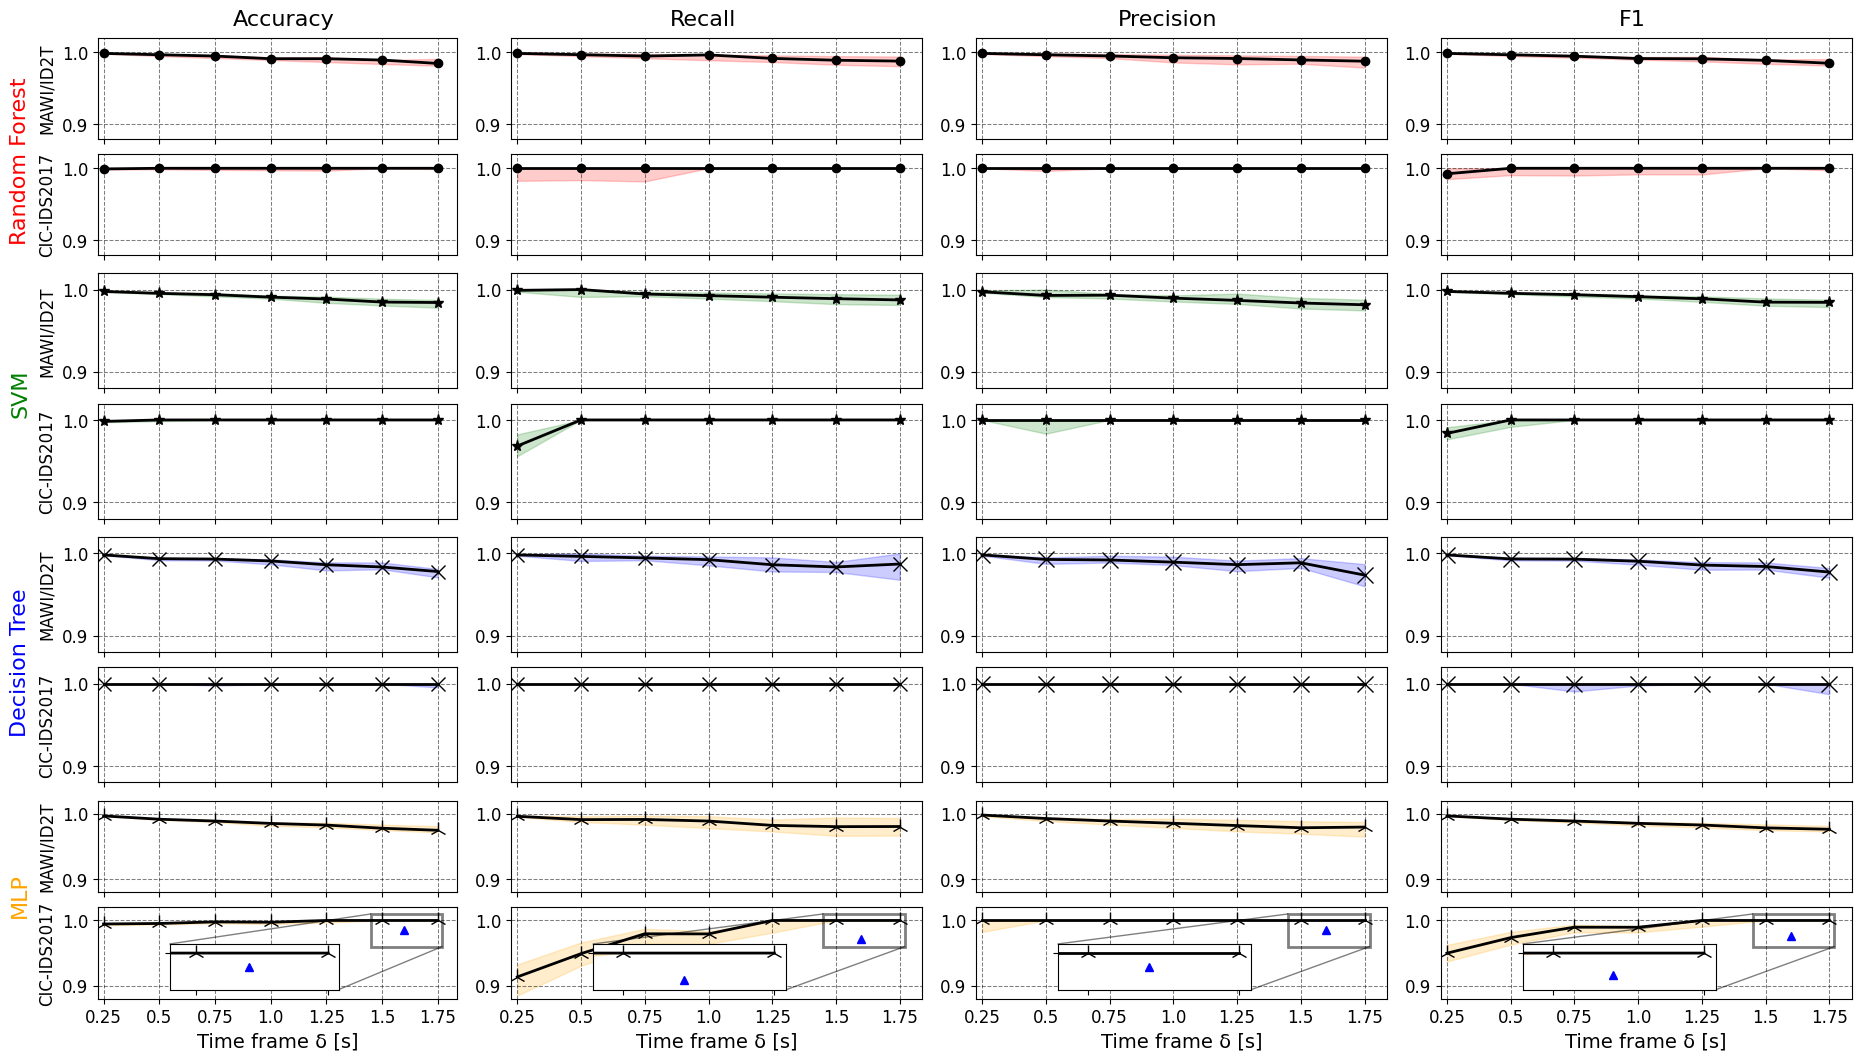

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

cic_data = {}
with open('../training/results/cic_benign_cic_portscan.json') as f:
    cic_data = json.load(f)

caida_data = {}
with open('../training/results/mawi_benign_mawi_portscan.json') as f:
    caida_data = json.load(f)


ml_algos = list(cic_data.keys())
ml_algo_names = {
    "RandomForestClassifier": "Random Forest",
    "SVC": "SVM",
    "DecisionTreeClassifier": "Decision Tree",
    "MLPClassifier": "MLP"
}
time_frames = list(map(lambda x: float(x), list(cic_data[ml_algos[0]].keys())))
metrics = list(cic_data[ml_algos[0]][str(time_frames[0])].keys())

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(18.5, 10.5)

subfigs = fig.subfigures(4, 4)

legends = []

for outerind, subfig in enumerate(subfigs.flat):
    ml_algo = ml_algos[outerind // 4]
    metric = metrics[outerind % 4]

    if outerind < 4:
        if outerind == 0:
            subfig.suptitle(metrics[outerind].capitalize(), fontsize=16, x=0.61)
        else:
            subfig.suptitle(metrics[outerind].capitalize(), fontsize=16, x=0.51)
    axs = subfig.subplots(2, 1)
    label_color = ["r", "g", "b", "orange"]
    y_offset = [0.4, 0.52, 0.5, 0.62]
    if outerind % 4 == 0:
        subfig.supylabel(ml_algo_names[ml_algos[outerind // 4]], fontsize=16, color=label_color[outerind // 4], y=y_offset[outerind // 4])
        axs[0].set_ylabel("MAWI/ID2T", fontsize=12)
        axs[1].set_ylabel("CIC-IDS2017", fontsize=12)
    
    
    axs[0].set_xticks(time_frames)
    axs[0].set_xlim([time_frames[0]*0.9, time_frames[-1]*1.05])
    axs[0].set_xticklabels([])
    axs[0].set_ylim([0.88, 1.02])
    axs[0].set_yticks([0.90, 1.0],)
    axs[0].tick_params(axis='y', which='major', labelsize=12)
    axs[0].grid(color='k', linestyle='--', linewidth=0.75, alpha=0.5)
    axs[1].set_xticks(time_frames)
    axs[1].set_xticklabels([])
    if outerind >= 12:
        axs[1].set_xlabel("Time frame δ [s]", fontsize=14)
        axs[1].set_xticklabels(time_frames)

    for index, data in enumerate([caida_data, cic_data]):
        ys = []
        lower_quartile = []
        upper_quartile = []
        for time_frame in time_frames:
            ys.append(np.median(data[ml_algo][str(time_frame)][metric]))
            lower_quartile.append(np.percentile(data[ml_algo][str(time_frame)][metric], 25))
            upper_quartile.append(np.percentile(data[ml_algo][str(time_frame)][metric], 75))
        marker = "o" if outerind < 4 else ("*" if outerind < 8 else ("x" if outerind < 12 else "2"))
        color_fill = "r" if outerind < 4 else ("g" if outerind < 8 else ("b" if outerind < 12 else "orange"))
        label = ml_algo if outerind % 4 == 0 else None
        marker_size = 6 if outerind < 4 else (8 if outerind < 8 else (10 if outerind < 10 else 12))
        axs[index].plot(time_frames, ys, color='k', linewidth=2, marker=marker, markersize=marker_size, label=label)
        axs[index].fill_between(time_frames, lower_quartile, upper_quartile, color=color_fill, alpha=0.2)

    axs[1].set_xlim([time_frames[0]*0.9, time_frames[-1]*1.05])
    axs[1].set_ylim([0.88, 1.02])
    axs[1].set_yticks([0.90, 1.0],)
    axs[1].tick_params(axis='both', which='major', labelsize=12)
    axs[1].grid(color='k', linestyle='--', linewidth=0.75, alpha=0.5)

    if "MLP" in ml_algo:
        axins = axs[1].inset_axes([0.2, 0.1, 0.47, 0.5])
        axins.plot(time_frames, ys, color='k', linewidth=2, marker=marker, markersize=marker_size)
        axins.fill_between(time_frames, lower_quartile, upper_quartile, color=color_fill, alpha=0.2)

        # subregion of the original image
        x1, x2, y1, y2 = 1.45, 1.77, 0.96, 1.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.set_xticks([1.5, 1.75])
        axins.set_yticks([1.0])
        
        if metric == "accuracy":
            axs[1].plot([1.6],[0.985], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.985], color='b', linewidth=2, marker='^', markersize=6)
        elif metric == "f1":
            axs[1].plot([1.6],[0.976], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.976], color='b', linewidth=2, marker='^', markersize=6)
        elif metric == "precision":
            axs[1].plot([1.6],[0.985], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.985], color='b', linewidth=2, marker='^', markersize=6)
        elif metric == "recall":
            axs[1].plot([1.6],[0.971], color='b', linewidth=2, marker='^', markersize=6)
            axins.plot([1.6],[0.971], color='b', linewidth=2, marker='^', markersize=6)
        axs[1].indicate_inset_zoom(axins, edgecolor="black", linewidth=2)


import datetime
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H_%M_%S")
plt.savefig(f"figures/ml_matrix_port_scan_{current_time}.png", bbox_inches='tight', dpi=300)
plt.show()